### **Laboratorio 6**

- Juan Pablo Solis
- Isabella Miralles

In [11]:
import json
import re
import string
import pandas as pd
import nltk

# Descargar stopwords en espa침ol (solo la primera vez)
nltk.download("stopwords")
from nltk.corpus import stopwords
stop_words = set(stopwords.words("spanish"))

def limpiar_texto(texto):
    texto = texto.lower()
    
    texto = re.sub(r"[@#']", "", texto)
    
    texto = re.sub(r"http\S+|www.\S+", "", texto)
    
    texto = re.sub(r"[^\w\s치칠칤칩칰칲침]", "", texto)
    
    texto = texto.translate(str.maketrans("", "", string.punctuation))
    
    texto = re.sub(r"\d+", "", texto)
    
    texto = " ".join([w for w in texto.split() if w not in stop_words])
    
    return texto.strip()

def cargar_tweets_archivo(archivo):
    registros = []
    buffer = ""
    nivel = 0
    
    with open(archivo, "r", encoding="utf-16") as f:
        for linea in f:
            buffer += linea
            nivel += linea.count("{")
            nivel -= linea.count("}")
            
            if nivel == 0 and buffer.strip().startswith("{"):
                try:
                    data = json.loads(buffer)
                    if "rawContent" in data:
                        registros.append({
                            "id": data.get("id"),
                            "date": data.get("date"),
                            "user": data.get("user", {}).get("username"),
                            "texto_original": data["rawContent"],
                            "texto_limpio": limpiar_texto(data["rawContent"]),
                            # 游댳 Metadatos adicionales
                            "retweets": data.get("retweetCount", 0),
                            "likes": data.get("likeCount", 0),
                            "replies": data.get("replyCount", 0),
                            "mentions": [u.get("username") for u in data.get("mentionedUsers", [])],
                            "in_reply_to": data.get("inReplyToUser", {}).get("username") if data.get("inReplyToUser") else None,
                            "conversationId": data.get("conversationId")
                        })
                except json.JSONDecodeError as e:
                    print("Error parseando:", e)
                buffer = ""
    
    return pd.DataFrame(registros)

df_trafico = cargar_tweets_archivo("data/traficogt.txt")
df_tioberny = cargar_tweets_archivo("data/tioberny.txt")

print("Tweets de traficoGT:", len(df_trafico))
print("Tweets de tioBerny:", len(df_tioberny))

df_trafico.head(), df_tioberny.head()


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Usuario\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Tweets de traficoGT: 5604
Tweets de tioBerny: 5019


(                    id                       date             user  \
 0  1834236045598056867  2024-09-12 14:22:06+00:00        traficogt   
 1  1834029142565658846  2024-09-12 00:39:56+00:00     monymmorales   
 2  1834039491826180424  2024-09-12 01:21:04+00:00  animaldgalaccia   
 3  1833963729136091179  2024-09-11 20:20:01+00:00   EstacionDobleA   
 4  1833665391698092330  2024-09-11 00:34:31+00:00       CubReserva   
 
                                       texto_original  \
 0  Es comprensible la resoluci칩n... El ruso sabe ...   
 1  La corrupci칩n de la @CC_Guatemala\nes descarad...   
 2  @PNCdeGuatemala @mingobguate @FJimenezmingob @...   
 3  @amilcarmontejo @AztecaNoticiaGT @BancadaSemil...   
 4  @soy_502 @AztecaNoticiaGT @CONAPgt @DenunciaEM...   
 
                                         texto_limpio  retweets  likes  \
 0  comprensible resoluci칩n ruso sabe engrasar maq...         0      1   
 1  corrupci칩n ccguatemala descarada falsificaci칩n...        56     84   
 2  pn

In [12]:
df_trafico.head()

id                       date             user  \
0  1834236045598056867  2024-09-12 14:22:06+00:00        traficogt   
1  1834029142565658846  2024-09-12 00:39:56+00:00     monymmorales   
2  1834039491826180424  2024-09-12 01:21:04+00:00  animaldgalaccia   
3  1833963729136091179  2024-09-11 20:20:01+00:00   EstacionDobleA   
4  1833665391698092330  2024-09-11 00:34:31+00:00       CubReserva   

                                      texto_original  \
0  Es comprensible la resoluci칩n... El ruso sabe ...   
1  La corrupci칩n de la @CC_Guatemala\nes descarad...   
2  @PNCdeGuatemala @mingobguate @FJimenezmingob @...   
3  @amilcarmontejo @AztecaNoticiaGT @BancadaSemil...   
4  @soy_502 @AztecaNoticiaGT @CONAPgt @DenunciaEM...   

                                        texto_limpio  retweets  likes  \
0  comprensible resoluci칩n ruso sabe engrasar maq...         0      1   
1  corrupci칩n ccguatemala descarada falsificaci칩n...        56     84   
2  pncdeguatemala mingobguate fjimenezmingob dieg...         0      1   
3  amilcarmontejo aztecanoticiagt bancadasemilla ...         0      0   
4  aztecanoticiagt conapgt denunciaempagua munigu...         0      1   

   replies                                           mentions     in_reply_to  \
0        0                                                 []            None   
1        0                                     [CC_Guatemala]            None   
2        0  [PNCdeGuatemala, mingobguate, FJimenezmingob, ...  PNCdeGuatemala   
3        0  [amilcarmontejo, AztecaNoticiaGT, BancadaSemil...  EstacionDobleA   
4        0  [soy_502, AztecaNoticiaGT, CONAPgt, DenunciaEM...      CubReserva   

        conversationId  
0  1834236045598056867  
1  1834029142565658846  
2  1834039491826180424  
3  1833963727575781534  
4  1833664431084949711

In [13]:
import pandas as pd

def construir_red(df):
    edges = []

    for _, row in df.iterrows():
        origen = row["user"]

        
        for m in row["mentions"]:
            edges.append({"source": origen, "target": m, "tipo": "mencion"})

        
        if row["in_reply_to"]:
            edges.append({"source": origen, "target": row["in_reply_to"], "tipo": "respuesta"})

        
        
        if row["retweets"] > 0:
            edges.append({"source": origen, "target": row["user"], "tipo": "retweet"})

    return pd.DataFrame(edges)


red_trafico = construir_red(df_trafico)
red_tioberny = construir_red(df_tioberny)

print("Red traficoGT:")
print(red_trafico.head())

print("\nRed tioBerny:")
print(red_tioberny.head())


Red traficoGT:
            source          target     tipo
0     monymmorales    CC_Guatemala  mencion
1     monymmorales    monymmorales  retweet
2  animaldgalaccia  PNCdeGuatemala  mencion
3  animaldgalaccia     mingobguate  mencion
4  animaldgalaccia  FJimenezmingob  mencion

Red tioBerny:
           source          target     tipo
0  La_ReVoluZzion  usembassyguate  mencion
1  La_ReVoluZzion  48CantonesToto  mencion
2  La_ReVoluZzion      USAIDGuate  mencion
3  La_ReVoluZzion     UEGuatemala  mencion
4  La_ReVoluZzion  BArevalodeLeon  mencion


 An치lisis b치sico de TraficoGT
Tweets totales: 5604
Usuarios 칰nicos: 2071
Total de menciones: 10929
Total de respuestas: 4150
Total de retweets: 168891

游녻 Usuarios m치s activos:
user
traficogt         781
batallonjalapa    133
mildred_gaitan    103
lahoragt           72
angeln8            49
Name: count, dtype: int64

游댕 Menciones m치s frecuentes:
[('traficogt', 4243), ('BArevalodeLeon', 432), ('DrGiammattei', 174), ('amilcarmontejo', 166), ('PrensaComunitar', 162)]




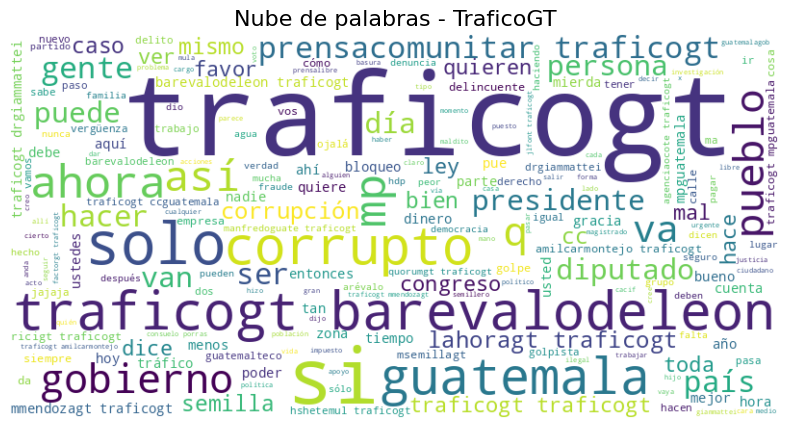

In [14]:
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt


def analisis_basico(df, nombre="dataset"):
    print(f" An치lisis b치sico de {nombre}")
    print("Tweets totales:", len(df))
    print("Usuarios 칰nicos:", df['user'].nunique())
    
    
    total_menciones = sum(len(m) for m in df['mentions'])
    print("Total de menciones:", total_menciones)
    
    
    total_respuestas = df['in_reply_to'].notna().sum()
    print("Total de respuestas:", total_respuestas)
    
    
    total_retweets = df['retweets'].sum()
    print("Total de retweets:", total_retweets)
    
    
    top_users = df['user'].value_counts().head(5)
    print("\n游녻 Usuarios m치s activos:")
    print(top_users)
    
    
    todas_menciones = [m for sublist in df['mentions'] for m in sublist]
    top_menciones = Counter(todas_menciones).most_common(5)
    print("\n游댕 Menciones m치s frecuentes:")
    print(top_menciones)


analisis_basico(df_trafico, "TraficoGT")
print("\n" + "="*50 + "\n")


def nube_palabras(df, nombre="dataset"):
    texto = " ".join(df["texto_limpio"].dropna())
    wc = WordCloud(width=800, height=400, background_color="white", colormap="viridis").generate(texto)
    
    plt.figure(figsize=(10,5))
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(f"Nube de palabras - {nombre}", fontsize=16)
    plt.show()


nube_palabras(df_trafico, "TraficoGT")


 An치lisis b치sico de TioBerny
Tweets totales: 5019
Usuarios 칰nicos: 2620
Total de menciones: 17310
Total de respuestas: 4370
Total de retweets: 109290

游녻 Usuarios m치s activos:
user
ElrevoltijoGT      40
BenitoC67601310    31
ialmgg             21
arronchopa         21
MinfinGT           20
Name: count, dtype: int64

游댕 Menciones m치s frecuentes:
[('BArevalodeLeon', 4830), ('GuatemalaGob', 915), ('UbaldoMacu', 574), ('santipalomov', 528), ('MPguatemala', 466)]


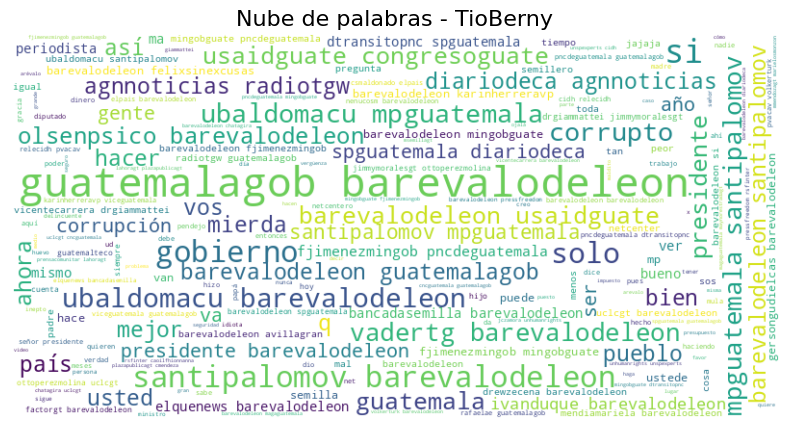

In [15]:
analisis_basico(df_tioberny, "TioBerny")
nube_palabras(df_tioberny, "TioBerny")


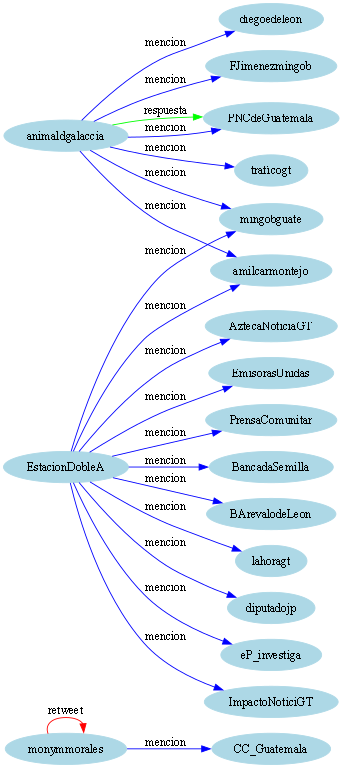

In [16]:
import pandas as pd
from graphviz import Digraph
from IPython.display import Image

# --- Construir red de interacciones ---
def construir_red(df):
    edges = []
    for _, row in df.iterrows():
        origen = row["user"]

        # Menciones
        for m in row["mentions"]:
            edges.append({"source": origen, "target": m, "tipo": "mencion"})

        # Respuestas
        if row["in_reply_to"]:
            edges.append({"source": origen, "target": row["in_reply_to"], "tipo": "respuesta"})

        # Retweets
        if row["retweets"] > 0:
            edges.append({"source": origen, "target": row["user"], "tipo": "retweet"})
    
    return pd.DataFrame(edges)

# --- Graficar con Graphviz ---
def graficar_red(df_red, titulo="subred"):
    dot = Digraph(comment=titulo)
    dot.attr(rankdir="LR", size="8")
    
    # Nodos
    usuarios = set(df_red["source"]).union(set(df_red["target"]))
    for u in usuarios:
        dot.node(u, u, shape="ellipse", color="lightblue", style="filled")
    
    # Aristas
    for _, row in df_red.iterrows():
        color = "black"
        if row["tipo"] == "mencion":
            color = "blue"
        elif row["tipo"] == "respuesta":
            color = "green"
        elif row["tipo"] == "retweet":
            color = "red"
        
        dot.edge(row["source"], row["target"], label=row["tipo"], color=color)
    
    return dot

# ================================
# EJEMPLO DE USO PARA AMBOS DF
# ================================

# Construir redes
red_trafico = construir_red(df_trafico)
red_tioberny = construir_red(df_tioberny)

# --- Subred con los primeros 20 registros ---
sub_red_trafico = red_trafico.head(20)
sub_red_tioberny = red_tioberny.head(20)

# --- Graficar y mostrar inline ---
dot_trafico = graficar_red(sub_red_trafico, "Subred TraficoGT")
dot_tioberny = graficar_red(sub_red_tioberny, "Subred TioBerny")

Image(dot_trafico.pipe(format="png"))


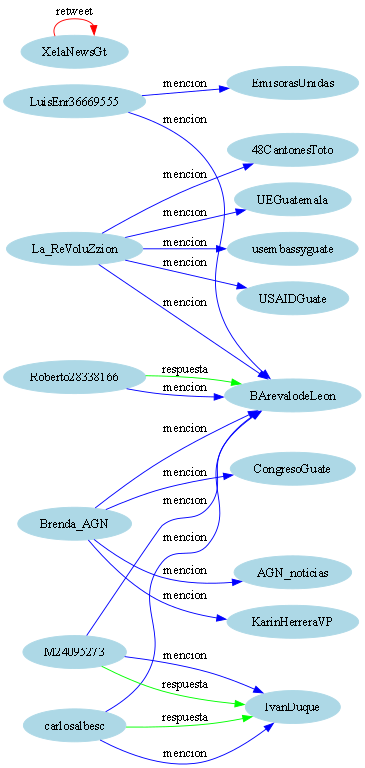

In [17]:
Image(dot_tioberny.pipe(format="png"))
